### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_scan_flatvh_75_180_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_1811/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  crossing_angle qx     qy                          
lhcb1 120.0          62.305 60.310      base_collider   
                     62.306 60.311      base_collider   
                     62.307 60.312      base_collider   
                     62.308 60.313      base_collider   
                     62.309 60.314      base_collider   
...                                               ...   
      270.0          62.325 60.330      base_collider   
                     62.326 60.331      base_collider   
                     62.327 60.332      base_collider   
                     62.328 60.333      base_collider   
                     62.329 60.334      base_collider   

                                    normalized amplitude in xy-plane      qx  \
beam  crossing_angle qx     qy                                                 
lhcb1 120.0          62.305 60.310                             2.000  62.305   
                     62.306 60.311                             2.000  62.306   
                     62.307 60.312                             2.000  62.307   
                     62.308 60.313                             2.000  62.308   
                     62.309 60.314                             2.000  62.309   
...                                                              ...     ...   
      270.0          62.325 60.330                             3.724  62.325   
                     62.326 60.331                             3.241  62.326   
                     62.327 60.332                             2.138  62.327   
                     62.328 60.333                             2.000  62.328   
                     62.329 60.334                             2.000  62.329   

                                        qy  dqx  dqy  i_bunch_b1  i_bunch_b2  \
beam  crossing_angle qx     qy                                                 
lhcb1 120.0          62.305 60.310  60.310  5.0  5.0         NaN         NaN   
                     62.306 60.311  60.311  5.0  5.0         NaN         NaN   
                     62.307 60.312  60.312  5.0  5.0         NaN         NaN   
                     62.308 60.313  60.313  5.0  5.0         NaN         NaN   
                     62.309 60.314  60.314  5.0  5.0         NaN         NaN   
...                                    ...  ...  ...         ...         ...   
      270.0          62.325 60.330  60.330  5.0  5.0         NaN         NaN   
                     62.326 60.331  60.331  5.0  5.0         NaN         NaN   
                     62.327 60.332  60.332  5.0  5.0         NaN         NaN   
                     62.328 60.333  60.333  5.0  5.0         NaN         NaN   
                     62.329 60.334  60.334  5.0  5.0         NaN         NaN   

                                    i_oct_b1  i_oct_b2  \
beam  crossing_angle qx     qy                           
lhcb1 120.0          62.305 60.310      60.0      60.0   
                     62.306 60.311      60.0      60.0   
                     62.307 60.312      60.0      60.0   
                     62.308 60.313      60.0      60.0   
                     62.309 60.314      60.0      60.0   
...                                      ...       ...   
      270.0          62.325 60.330      60.0      60.0   
                     62.326 60.331      60.0      60.0   
                     62.327 60.332      60.0      60.0   
                     62.328 60.333      60.0      60.0   
                     62.329 60.334      60.0      60.0   

                                    num_particles_per_bunch  crossing_angle  
beam  crossing_angle qx     qy                                               
lhcb1 120.0          62.305 60.310             1.400000e+11           120.0  
                     62.306 60.311             1.400000e+11           120.0  
                     62.307 60.312             1.400000e+11           120.0  
                     62.308 60.313             1.400000e+11       

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="qx", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
qx,,,,,,,,,,,,,,,,
62.305,2.000,2.000,2.069,2.966,3.448,3.517,3.655,3.379,3.448,3.586,3.586,3.724,3.379,3.931,4.552,4.138
62.306,2.000,2.000,2.000,3.241,3.448,3.379,3.379,3.379,3.586,3.862,3.310,4.414,4.690,4.069,5.448,5.931
62.307,2.000,2.000,2.552,3.241,3.379,3.517,3.448,3.586,3.586,4.207,5.103,4.897,5.379,5.241,5.862,5.655
62.308,2.000,2.000,2.966,3.310,3.241,3.448,3.586,3.862,4.552,4.759,5.034,5.586,6.069,6.000,5.931,5.724
62.309,2.000,2.000,2.897,3.034,3.103,3.310,3.793,4.069,5.241,5.724,5.379,5.517,6.000,5.724,5.241,6.000
62.310,2.000,2.414,2.966,2.966,3.103,3.517,4.759,5.103,5.241,5.448,5.586,5.586,5.517,5.586,5.103,6.000
62.311,2.000,2.621,2.897,3.172,3.517,4.069,4.759,4.828,5.103,5.448,5.517,5.586,5.310,5.655,6.207,5.724
62.312,2.000,2.759,2.897,2.966,3.793,4.690,4.966,4.966,5.310,5.310,5.586,5.724,5.655,5.862,6.207,6.966
62.313,2.069,2.690,2.759,3.172,4.138,4.483,4.897,5.241,5.241,5.655,5.931,6.069,6.345,6.345,6.414,7.241


In [4]:
l_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in l_xing]

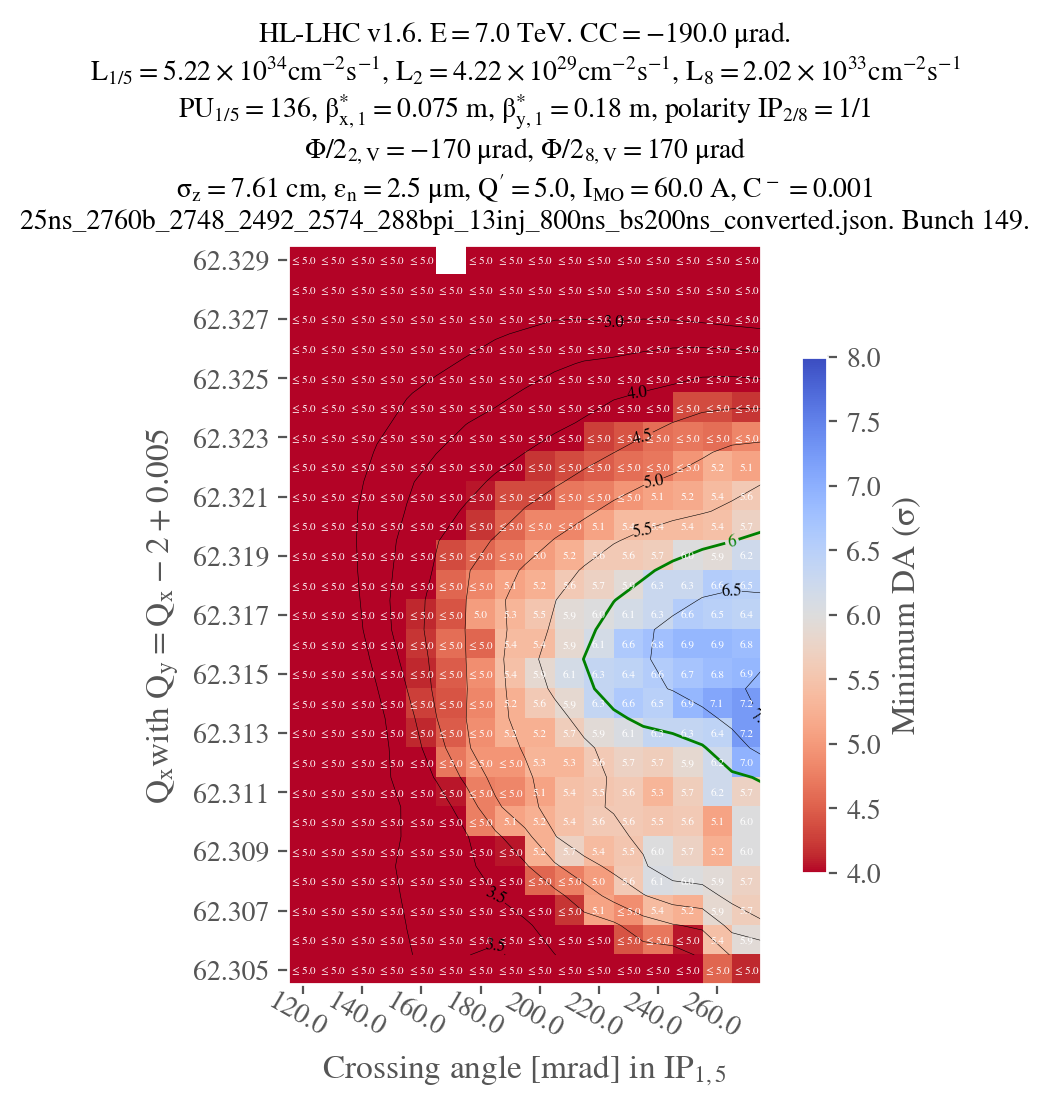

In [5]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.075,
    bety=0.18,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    vmin=4.,
    vmax=8.0,
    CC = True,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$",
)
# ! Verified
